In [98]:
import pandas as pd
pd.set_option("display.max_rows",1000)

In [99]:
manufacturing = pd.read_csv("C:\\Users\\grish\\Downloads\\manufacturing - Tabellenblatt1 (5).csv")
manufacturing = manufacturing.rename({"DATE":"date"}, axis=1)
manufacturing = manufacturing[["total_manufacturing","formatted_date"]]
manufacturing = manufacturing.rename({"formatted_date":"formatted_month"}, axis=1)
manufacturing["formatted_month"] = manufacturing["formatted_month"].astype(int).astype(str)

In [100]:
covid = pd.read_csv("C:\\Users\\grish\\Downloads\\us_covid - us_covid (2).csv")
covid = covid[['new_cases','new_deaths', 'formatted_date']]

covid = covid.fillna(0)

covid = covid.head(366+365)

In [101]:
snp = pd.read_excel("C:\\Users\\grish\\Downloads\\s_p500.xlsx")
snp = snp.iloc[::-1]
snp.rename(columns = {'Date':'date'}, inplace =True)
snp = snp[["formatted_date","SnP_Close","SnP_Volume","VIX"]]

In [102]:
gdp = pd.read_csv(r"C:\Users\grish\Downloads\gdp quaterly.xlsx - quarterly.csv")
gdp = gdp[['GDP','formatted_date']]
gdp.rename(columns = {'DATE':'date'}, inplace =True)

In [103]:
unemployment = pd.read_excel(r"C:\Users\grish\Downloads\econ_factors.xlsx", sheet_name="monthly")
unemployment.rename(columns = {'DATE':'date'}, inplace =True)
unemployment = unemployment[['UNRATE','formatted_date']]

In [104]:
unemployment['formatted_date'] = unemployment['formatted_date'].astype(str)

unemployment['formatted_date'] = unemployment['formatted_date'].map(lambda x: str(x)[:-2])
unemployment = unemployment.rename({"formatted_date":"formatted_month"}, axis=1)

In [105]:
# snp to monthly
snp_cleaned = pd.DataFrame()
snp["formatted_date"] = snp["formatted_date"].astype(int).astype(str)
for year in ["2020", "2021"]:
    for month in range(1, 13):
        month = year + (str(month).zfill(2))
        temp_snp_monthly = snp[snp['formatted_date'].str.contains(month)].mean()
        temp_snp_monthly["formatted_month"] = month
        temp_snp_monthly = temp_snp_monthly.to_frame().T
        temp_snp_monthly.drop("formatted_date", axis=1, inplace=True)
        snp_cleaned = pd.concat([snp_cleaned, temp_snp_monthly], axis=0)
        

In [106]:
# covid to monthly
covid_cleaned = pd.DataFrame()
covid["formatted_date"] = covid["formatted_date"].astype(int).astype(str)
for year in ["2020", "2021"]:
    for month in range(1, 13):
        month = year + (str(month).zfill(2))
        temp_covid_monthly = covid[covid['formatted_date'].str.contains(month)].mean()
        temp_covid_monthly["formatted_month"] = month
        temp_covid_monthly = temp_covid_monthly.to_frame().T
        temp_covid_monthly.drop("formatted_date", axis=1, inplace=True)
        covid_cleaned = pd.concat([covid_cleaned, temp_covid_monthly], axis=0)
        


In [107]:
# gdp to monthly
gdp['formatted_date'] = pd.to_datetime(gdp['formatted_date'], format='%Y%m')
gdp = gdp.set_index('formatted_date')
date_range = pd.date_range(start='2020-01-01', end='2021-10-01', freq='MS')
gdp_cleaned = gdp.reindex(date_range).interpolate(method='linear')
gdp_cleaned.index = gdp_cleaned.index.astype("str").map(lambda x: int(x.replace('-', '')))

#gdp_cleaned.index = gdp_cleaned.index.astype("str").map(lambda x: int(x.replace('01$', '')))
gdp_cleaned = gdp_cleaned.rename_axis('formatted_date').reset_index()

In [108]:
gdp_cleaned['formatted_date'] = gdp_cleaned['formatted_date'].astype(str)

gdp_cleaned['formatted_date'] = gdp_cleaned['formatted_date'].map(lambda x: str(x)[:-2])

In [109]:
gdp_cleaned = gdp_cleaned.rename({"formatted_date":"formatted_month"}, axis=1)

In [110]:
consolidated_df = covid_cleaned
consolidated_df = pd.merge(consolidated_df,manufacturing, on='formatted_month', how='left')
consolidated_df = pd.merge(consolidated_df,gdp_cleaned, on='formatted_month', how='left')
consolidated_df = pd.merge(consolidated_df,snp_cleaned, on='formatted_month', how='left')
consolidated_df = pd.merge(consolidated_df,unemployment, on='formatted_month', how='left')
consolidated_df["formatted_month"] = consolidated_df["formatted_month"].astype("int").astype("str")
consolidated_df.set_index("formatted_month",inplace=True)
#consolidated_df.set_index("date",inplace=True)
consolidated_df.fillna(method="ffill", inplace = True)
consolidated_df

,new_cases,new_deaths,total_manufacturing,GDP,SnP_Close,SnP_Volume,VIX,UNRATE
formatted_month,,,,,,,,
202001,0.258065,0.000000,459272,21538.032000,3276.047273,3.644670e+09,13.933636,3.5
202002,2.103448,0.034483,460927,20904.265000,3277.314211,4.444031e+09,19.628947,3.5
202003,5583.032258,107.290323,416951,20270.498000,2652.393636,7.372063e+09,57.736818,4.4
202004,28572.100000,1904.466667,356382,19636.731000,2761.975238,5.886103e+09,41.453810,14.7
202005,24358.580645,1447.225806,377550,20211.963333,2919.608500,5.356760e+09,30.897000,13.2
202006,27373.033333,764.166667,408711,20787.195667,3104.660909,5.975404e+09,31.119545,11.0
202007,60781.548387,926.354839,431781,21362.428000,3207.619091,4.405824e+09,26.840455,10.2
202008,49178.645161,1026.806452,436444,21476.520667,3391.710000,3.926977e+09,22.889524,8.4
202009,40056.833333,712.033333,441723,21590.613333,3365.516667,4.395751e+09,27.647619,7.9


In [111]:
# scale every column using min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
consolidated_df[consolidated_df.columns] = scaler.fit_transform(consolidated_df[consolidated_df.columns])

In [112]:
for iters in range(consolidated_df.shape[1]):
    consolidated_df.iloc[:,iters] = consolidated_df.iloc[:,iters].apply(lambda x: float(x))

Model slope:     1.09
Model intercept: -0.18
[0. 1.] [-0.17849381  0.91346237]


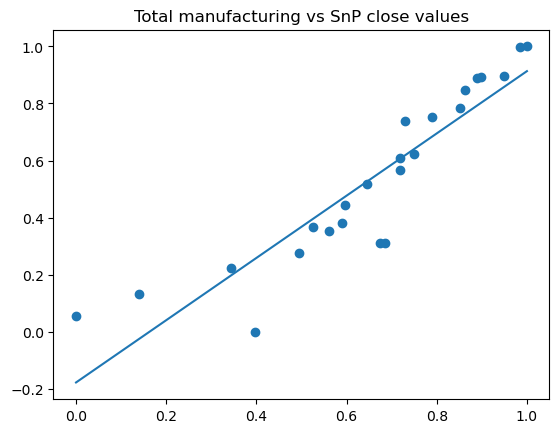

In [113]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = consolidated_df["total_manufacturing"]
y = consolidated_df["SnP_Close"]
def my_lr_train(X_train, y_train):
    # concatenating a column with all one to X_train for handling the bias term
    X_train = np.c_[np.ones(X_train.shape[0]), X_train] 
    # compute the regression model parameters
    w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)),np.dot(np.transpose(X_train),y_train))
    return w

w = my_lr_train(x, y)

print("Model slope:    ", round(w[1],2))
print("Model intercept:", round(w[0],2))

xfit = np.array([x.min(), x.max()])
yfit = np.dot(np.c_[np.ones(xfit.shape[0]), xfit], w)
plt.figure()
plt.title("Total manufacturing vs SnP close values") 
plt.scatter(x, y)
print(xfit,yfit)
plt.plot(xfit, yfit)

Model slope:     0.47
Model intercept: 0.37
[0. 1.] [0.37249381 0.83786837]


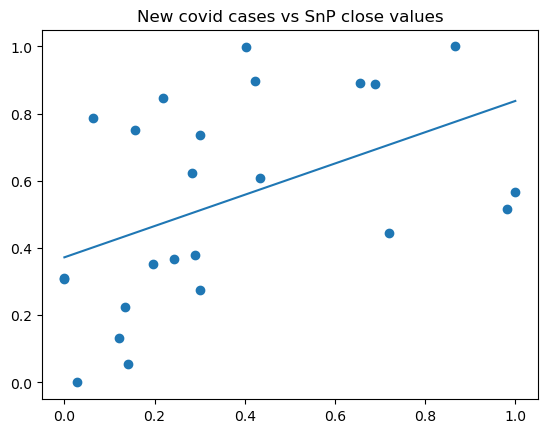

In [114]:
import matplotlib.pyplot as plt
import numpy as np

x = consolidated_df["new_cases"]
y = consolidated_df["SnP_Close"]
w = my_lr_train(x, y)

print("Model slope:    ", round(w[1],2))
print("Model intercept:", round(w[0],2))

xfit = np.array([x.min(), x.max()])
yfit = np.dot(np.c_[np.ones(xfit.shape[0]), xfit], w)
plt.figure()
plt.title("New covid cases vs SnP close values")  
plt.scatter(x, y)
print(xfit,yfit)
plt.plot(xfit, yfit)

Model slope:     -0.06
Model intercept: 0.95
[ 3.5 14.7] [0.73869501 0.04995336]


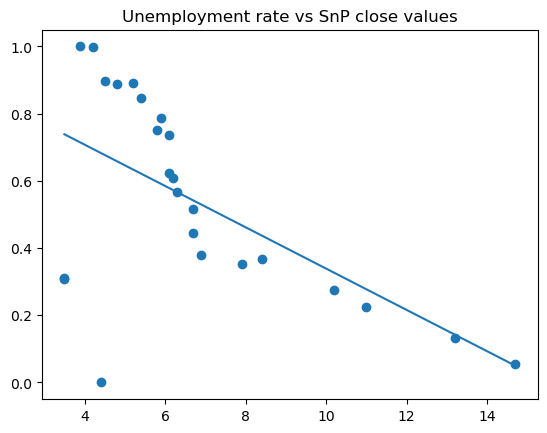

In [115]:
x = unemployment["UNRATE"]
y = consolidated_df["SnP_Close"]
w = my_lr_train(x, y)

print("Model slope:    ", round(w[1],2))
print("Model intercept:", round(w[0],2))

xfit = np.array([x.min(), x.max()])
yfit = np.dot(np.c_[np.ones(xfit.shape[0]), xfit], w)
plt.figure()
plt.title("Unemployment rate vs SnP close values")  
plt.scatter(x, y)
print(xfit,yfit)
plt.plot(xfit, yfit)

Model slope:     1.0
Model intercept: -0.03
[0. 1.] [-0.02833269  0.97563492]


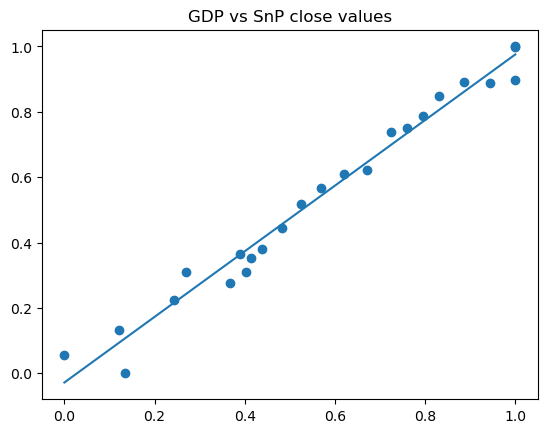

In [116]:
x = consolidated_df["GDP"]
y = consolidated_df["SnP_Close"]

w = my_lr_train(x, y)

print("Model slope:    ", round(w[1],2))
print("Model intercept:", round(w[0],2))

xfit = np.array([x.min(), x.max()])
yfit = np.dot(np.c_[np.ones(xfit.shape[0]), xfit], w)
plt.figure()
plt.title("GDP vs SnP close values")  
plt.scatter(x, y)
print(xfit,yfit)
plt.plot(xfit, yfit)

In [117]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

def my_k_means(X, n_clusters, rseed=2):
    # Randomly choose n_clusters cluster centres
    rng = np.random.RandomState(rseed) # random number generator
    i = rng.permutation(X.shape[0])[:n_clusters] # select n_clusters data points randomly
    centers = X[i] # set the selected data points as centers
    
    while True:
        # Assign labels based on the closest center
        cluster_labels = pairwise_distances_argmin(X, centers)
        
        # Compute new centers per cluster
        new_centers = np.array([X[cluster_labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, cluster_labels

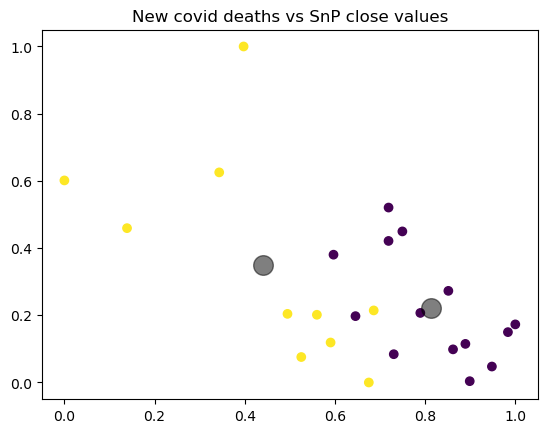

In [118]:
# test our k-means algorithm
import matplotlib.pyplot as plt
import pandas as pd


X = consolidated_df.values

centers, cluster_labels = my_k_means(X, 2)
plt.figure()
plt.title("New covid deaths vs SnP close values")  
plt.scatter(X[:, 2], X[:, 5], c=cluster_labels);
plt.scatter(centers[:, 2], centers[:,5], c='black', s=200, alpha=0.5);

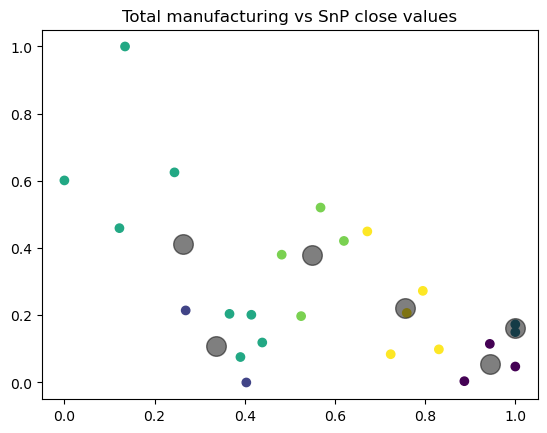

In [119]:

centers, cluster_labels = my_k_means(X, 6)
plt.figure()
plt.title("Total manufacturing vs SnP close values")  
plt.scatter(X[:, 3], X[:, 5], c=cluster_labels);
plt.scatter(centers[:, 3], centers[:,5], c='black', s=200, alpha=0.5);

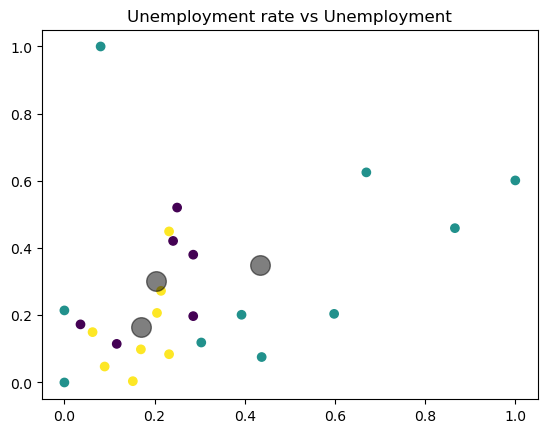

In [120]:

centers, cluster_labels = my_k_means(X, 3)
plt.figure()
plt.title("Unemployment rate vs Unemployment")  
plt.scatter(X[:, 7], X[:, 5], c=cluster_labels);
plt.scatter(centers[:, 7], centers[:,5], c='black', s=200, alpha=0.5);

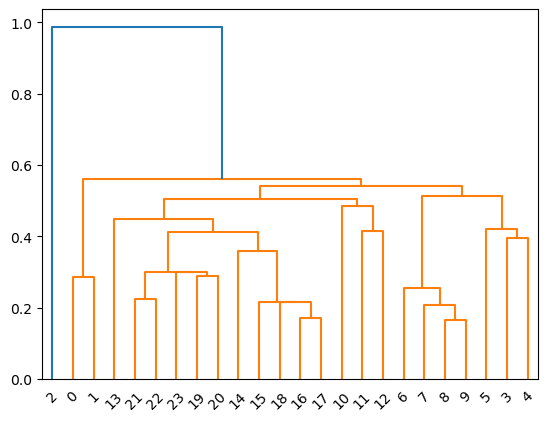

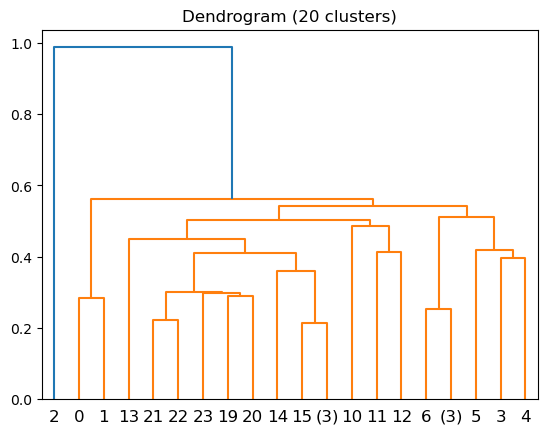

In [121]:
import scipy.cluster.hierarchy as shc

plt.figure()
dend = shc.dendrogram(shc.linkage(X, method='single'))
plt.figure()
plt.title("Dendrogram (20 clusters)") 
dend1 = shc.dendrogram(shc.linkage(X, method='single'), p=20, truncate_mode='lastp')

In [122]:
X = consolidated_df.drop(["SnP_Close"], axis=1).values
y = consolidated_df["SnP_Close"].values
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, Y_train)

y_pred = lr_model.predict(X_test)

In [123]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R2 Score: ", r2)

MAE:  0.08870245251194606
MSE:  0.010800519715380178
RMSE: 0.10392554890584017
R2 Score:  0.6298094960183787


In [124]:
from sklearn.model_selection import cross_val_score
lr_model = LinearRegression(fit_intercept=True)
mse = -cross_val_score(lr_model, X, y, cv=24, scoring = 'neg_mean_squared_error')
print('prediction SnP_close')
print('MSE = ',mse)
print('MSE (average) = ',round(mse.mean(),24))

prediction SnP_close
MSE =  [1.81664675e-02 2.60281531e-02 3.00535437e-02 1.62795509e-02
 1.04176429e-05 1.90552997e-03 1.52331123e-02 6.31638771e-06
 7.36490375e-04 3.84295182e-07 2.11142307e-03 6.76213334e-05
 2.05813579e-05 2.70046025e-04 2.53151553e-03 1.62316166e-03
 3.21277198e-04 1.97476983e-06 2.44454127e-03 1.48034338e-03
 8.26298622e-04 8.56825934e-03 1.51378839e-03 2.38091142e-03]
MSE (average) =  0.005524237902171706


In [125]:
X = consolidated_df.drop(["UNRATE"], axis=1).values
y = consolidated_df["UNRATE"].values
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, Y_train)

y_pred = lr_model.predict(X_test)

In [126]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R2 Score: ", r2)

MAE:  0.19559903080204416
MSE:  0.08962149668417663
RMSE: 0.29936849647913294
R2 Score:  -41.84344719536249


In [127]:

lr_model = LinearRegression(fit_intercept=True)
mse = -cross_val_score(lr_model, X, y, cv=10, scoring = 'neg_mean_squared_error')
print('prediction for unemployment rate')
print('MSE = ',mse)
print('MSE (average) = ',round(mse.mean(),3))

prediction for unemployment rate
MSE =  [0.11271927 0.02824531 0.03664799 0.00806708 0.00662547 0.00722982
 0.00503003 0.00049281 0.01060062 0.00072241]
MSE (average) =  0.022


In [128]:
X = consolidated_df.drop(["VIX"], axis=1).values
y = consolidated_df["VIX"].values
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=24)
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, Y_train)

y_pred = lr_model.predict(X_test)

In [129]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R2 Score: ", r2)

MAE:  0.10551969357639268
MSE:  0.014232559193203315
RMSE: 0.11930028999630854
R2 Score:  0.01655784184470921


In [130]:

lr_model = LinearRegression(fit_intercept=True)
mse = -cross_val_score(lr_model, X, y, cv=10, scoring = 'neg_mean_squared_error')
print('prediction for VIX values')
print('MSE = ',mse)
print('MSE (average) = ',round(mse.mean(),3))

prediction for VIX values
MSE =  [0.1009717  0.01647147 0.03242859 0.02052275 0.00034579 0.00963468
 0.00238413 0.00277787 0.00023636 0.00819875]
MSE (average) =  0.019


In [131]:
X = consolidated_df.drop(["new_deaths"], axis=1).values
y = consolidated_df["new_deaths"].values
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=24)
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, Y_train)

y_pred = lr_model.predict(X_test)

In [132]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R2 Score: ", r2)

MAE:  0.15370737683409874
MSE:  0.03572936326543435
RMSE: 0.18902212374596353
R2 Score:  -2.1195026307823235


In [133]:

lr_model = LinearRegression(fit_intercept=True)
mse = -cross_val_score(lr_model, X, y, cv=10, scoring = 'neg_mean_squared_error')
print('new deaths prediction')
print('MSE = ',mse)
print('MSE (average) = ',round(mse.mean(),3))

new deaths prediction
MSE =  [0.07340314 0.04712749 0.0057454  0.04179038 0.16546847 0.00505141
 0.00318219 0.02098097 0.06331517 0.01723977]
MSE (average) =  0.044


In [134]:

X = consolidated_df.drop(["total_manufacturing"], axis=1).values
y = consolidated_df["total_manufacturing"].values
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=24)
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, Y_train)

y_pred = lr_model.predict(X_test)

In [135]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R2 Score: ", r2)

MAE:  0.04386074939614264
MSE:  0.0036916886329199177
RMSE: 0.060759267876760316
R2 Score:  0.9192368658592704


In [136]:
lr_model = LinearRegression(fit_intercept=True)
mse = -cross_val_score(lr_model, X, y, cv=10, scoring = 'neg_mean_squared_error')
print('manufacturing prediction')
print('MSE = ',mse)
print('MSE (average) = ',round(mse.mean(),3))

manufacturing prediction
MSE =  [1.07088369e-02 1.66435561e-02 7.55514000e-03 2.35303649e-03
 8.50589429e-03 1.64979431e-03 6.25600635e-04 1.98524077e-05
 2.30192148e-03 1.69491189e-04]
MSE (average) =  0.005
